# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

При выполнении этой лабораторной вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [2551]:
import numpy as np
import matplotlib.pyplot as plt
data_train = np.loadtxt('/Users/anastasia/Desktop/train.txt', delimiter=',')
data_test = np.loadtxt('/Users/anastasia/Desktop/test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [2552]:
X_train = data_train[:,0]
Y_train = data_train[:,1]

X_test = data_test[:,0]
Y_test = data_test[:,1]


**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [2553]:
#for test
n = len(X_test)
b = np.ones(n)
A = np.vstack([X_test, b])
B = A.T
prom_res_1 = np.linalg.inv(np.matmul( B.T, B))
prom_res_2 = np.matmul(prom_res_1, B.T)
res = np.matmul(prom_res_2, Y_test)
print("y = ", res[0], "* x + ", res[1])

y =  2.3409918970315435 * x +  4.212934353568335


In [2554]:
#for train
n = len(X_train)
b = np.ones(n)
A = np.vstack([X_train, b])
B = A.T
prom_res_1_t = np.linalg.inv(np.matmul( B.T, B))
prom_res_2_t = np.matmul(prom_res_1_t, B.T)
res_t = np.matmul(prom_res_2_t, Y_train)
print("y = ", res_t[0], "* x + ", res_t[1])

y =  2.279134498051949 * x +  4.433230905064934


**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

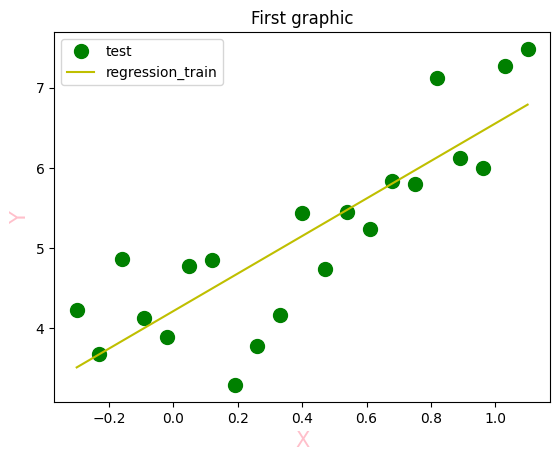

In [2555]:
#for test
fig = plt.subplots()
plt.title("First graphic")
ax = plt.gca()
ax.set_xlabel("X", fontsize=15, color='pink')
ax.set_ylabel("Y", fontsize=15, color='pink')

#plt.plot(X_test, Y_test)
plt.plot(X_test, Y_test, 'o', label='test', markersize=10, color = "g")

y = res[0]*X_test + res[1]

plt.plot(X_test, y, label = "regression_train", color = 'y')

plt.legend()


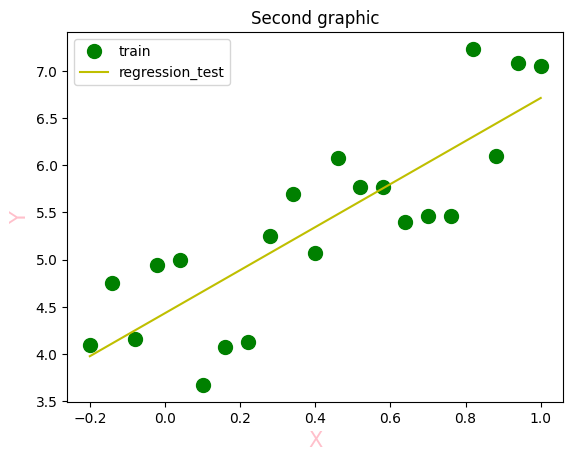

In [2556]:
#for train
plt.title("Second graphic")
ax = plt.gca()
ax.set_xlabel("X", fontsize=15, color='pink')
ax.set_ylabel("Y", fontsize=15, color='pink')

#plt.plot(X_train, Y_train)
plt.plot(X_train, Y_train, 'o', label='train', markersize=10, color = "g")

y_t = res_t[0]*X_train + res_t[1]

plt.plot(X_train, y_t, label = "regression_test", color = 'y' )

plt.legend()

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

**Решение :**

Многочлен будет давать более точный результат, если его значение в каждой точке будет совпадать с значением в точке (X_test, Y_test), в этом случае ошибка будет равна 0. Для этой цели подойдет интерполяционный многочлен Лагранжа.

Таким образом, нам потребуется многочлен 20 степени (в тестовой выборке ровно 21 измерение).

Решение:

In [2557]:
train_vander = np.fliplr(np.vander(X_train, len(X_train)))
poly_coef = np.linalg.solve(train_vander, Y_train)
for i in range(len(poly_coef)):
    if i!= 0:
        if poly_coef[i] >0:
            print( "+", poly_coef[i], "x^", i, end = ' ')
        elif poly_coef[i]<0:
            print(poly_coef[i], "x^", i,  end = ' ')
    else:
        print(poly_coef[i], end = ' ')

3.226886522171545 -0.750305097551139 x^ 1 + 3249.3101085241397 x^ 2 -58731.829130955746 x^ 3 -168051.87065464628 x^ 4 + 10681239.99559439 x^ 5 -75550769.48790585 x^ 6 -103312444.28773598 x^ 7 + 4003468382.589122 x^ 8 -21312104651.227726 x^ 9 + 27184225820.886543 x^ 10 + 232634917712.22485 x^ 11 -1535228643018.5024 x^ 12 + 4915793162270.232 x^ 13 -10194153011139.848 x^ 14 + 14678936507260.746 x^ 15 -14904614611357.797 x^ 16 + 10516988636994.61 x^ 17 -4921985118620.723 x^ 18 + 1376054810059.3596 x^ 19 -174133834199.80795 x^ 20 

**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

(-1.5, 8.0)

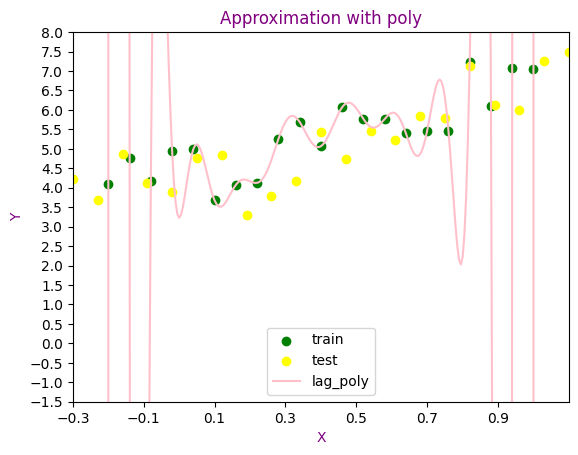

In [2558]:
def fun(graph, coef):
    return np.fliplr(np.vander(graph, len(X_train))).dot(coef) #считает степени от 1 до заданной  - элементов вектора

graph_x = np.arange(min(X_train)-0.1, 1.1, 0.005)
graph_y = fun(graph_x, poly_coef)

plt.title("Approximation with poly", color = 'purple')
ax = plt.gca()
ax.set_xlabel("X", fontsize=10, color='purple')
ax.set_ylabel("Y", fontsize=10, color='purple')
plt.scatter(X_train, Y_train, color='green', label="train")
plt.scatter(X_test, Y_test, color='yellow', label="test")
plt.plot(graph_x, graph_y, color="pink", label="lag_poly")
plt.legend()
plt.xticks(np.arange(min(X_train)-0.1, 1.1, 0.2))
plt.yticks(np.arange(-1.5, 8.1, 0.5))
plt.xlim(min(X_train)-0.1, 1.1)
plt.ylim(-1.5,8)

Здесь продемонстрирована переобученная модель, которая уже не будет давать валидные предсказания для выборки, отличной от обучающей.

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [2559]:
def regres_coef(X, Y):
    B = X
    res_t = np.matmul(np.matmul( np.linalg.inv(np.matmul( B.T, B)), B.T) , Y)
    return res_t

In [2560]:
poly_coefs = np.zeros((10, n))
#print(poly_coefs)
for k in range(10):
    mat_coef = np.fliplr(np.vander(X_train, k+2))
    poly_coefs[k] = np.append((regres_coef(mat_coef, Y_train.T)), np.zeros(n-k-2))

In [2561]:
for i in range(10):
    print("y = ", poly_coefs[i][0], end = ' ')
    for j in range(1, len(poly_coefs[i])):
        if poly_coefs[i][j]> 0:
            print("+" , poly_coefs[i][j], "x^", j, end = ' ')
        elif poly_coefs[i][j] < 0:
            print( poly_coefs[i][j], "x^", j, end = ' ')
    print('\n')


y =  4.433230905064936 + 2.2791344980519455 x^ 1 

y =  4.472476503404161 + 1.157831688359746 x^ 1 + 1.4016285121152734 x^ 2 

y =  4.460736355285022 + 1.065016105285528 x^ 1 + 1.8597508372610037 x^ 2 -0.3817686042881938 x^ 3 

y =  4.341166120398428 + 1.1718023926360233 x^ 1 + 6.794091784353473 x^ 2 -13.051328119982507 x^ 3 + 7.9184746973078575 x^ 4 

y =  4.431297813833127 -0.13059803987530927 x^ 1 + 3.274714401825517 x^ 2 + 21.374796276089256 x^ 3 -51.13148138515726 x^ 4 + 29.524978041259956 x^ 5 

y =  4.383795010972468 -4.597179324658876 x^ 1 + 16.002903990489724 x^ 2 + 121.25709712941533 x^ 3 -481.51013288821787 x^ 4 + 581.4532982481364 x^ 5 -229.9701334203665 x^ 6 

y =  4.4445127089961325 -4.008895918939154 x^ 1 + 7.2154586187959495 x^ 2 + 119.35078428556353 x^ 3 -314.2311724998698 x^ 4 + 122.87821699012329 x^ 5 + 238.69936793758006 x^ 6 -167.3819647814439 x^ 7 

y =  4.663789119596274 -5.182773285777447 x^ 1 -26.695631108097814 x^ 2 + 268.8604379564641 x^ 3 + 109.8956558158382

**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [2562]:
train_vander = np.fliplr(np.vander(X_train, len(X_train)))
Sum_train = np.sum((train_vander.dot(poly_coefs.T) - (np.array([Y_train] * 10)).T)**2, axis=0) / len(X_train)
Sum_train = np.append(Sum_train, np.sum((train_vander.dot(poly_coef.T) - np.array([Y_train]))**2) / len(X_train))


test_vander = np.fliplr(np.vander(X_test, len(X_test)))
Sum_test = np.sum((test_vander.dot(poly_coefs.T) - (np.array([Y_test] * 10)).T)**2, axis=0) / len(X_test)
Sum_test = np.append(Sum_test, np.sum((test_vander.dot(poly_coef.T) - Y_test)**2) / len(X_test))

errors = np.concatenate(([Sum_train], [Sum_test]), axis=0).T
q = 0
for i, j in errors:
    q+=1
    print("Errors for poly with deg ",q, ":", i, j)

Errors for poly with deg  1 : 0.2968966332625195 0.43512020040488814
Errors for poly with deg  2 : 0.26969891587669154 0.35647628878312454
Errors for poly with deg  3 : 0.269497187147961 0.35534645715185514
Errors for poly with deg  4 : 0.26106653305792726 0.4417270189277097
Errors for poly with deg  5 : 0.24998504648317554 0.5579732021736603
Errors for poly with deg  6 : 0.1882934898837046 2.5816929330526177
Errors for poly with deg  7 : 0.18539621153294408 2.515782902911566
Errors for poly with deg  8 : 0.15905556579089386 4.357288160918831
Errors for poly with deg  9 : 0.15847184274723444 4.776345566376028
Errors for poly with deg  10 : 0.15316610998191238 14.632663656981478
Errors for poly with deg  11 : 1.8581050857426967e-06 554604408235.9336


Получается, третья степень приближает по тестовой выборке с наименьшей ошибкой.

**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

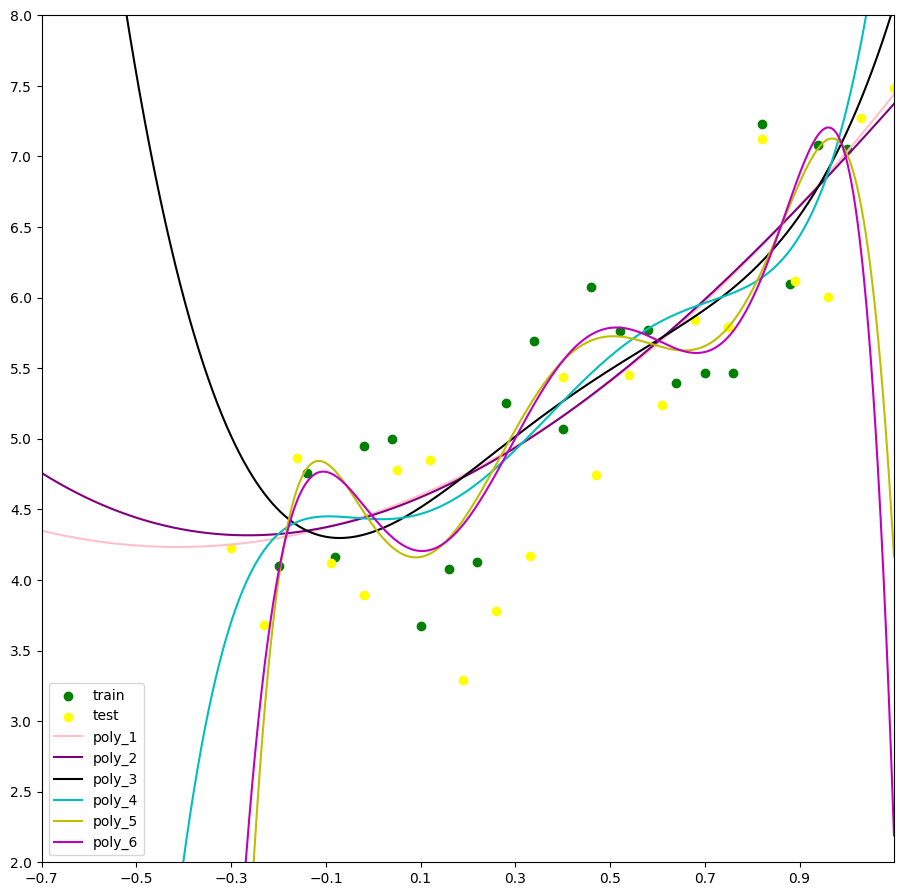

In [2563]:
graph_x = np.arange(-0.7, 1.1, 0.0005)

def fun(coef):
    coef = np.flip(coef)
    van = np.vander(graph_x, len(X_train), increasing = False)
    return van.dot(coef)

plt.figure(figsize=(11, 11))

plt.scatter(X_train, Y_train, color='green', label="train")
plt.scatter(X_test, Y_test, color='yellow', label="test")

graph_y = fun((poly_coefs[1]))
plt.plot(graph_x, graph_y, color="pink", label="poly_1")

graph_y = fun(poly_coefs[2])
plt.plot(graph_x, graph_y, color="purple", label="poly_2")

graph_y = fun(poly_coefs[3])
plt.plot(graph_x, graph_y, color="black", label="poly_3")

graph_y = fun(poly_coefs[4])
plt.plot(graph_x, graph_y, color="c", label="poly_4")

graph_y = fun(poly_coefs[5])
plt.plot(graph_x, graph_y, color="y", label="poly_5")

graph_y = fun(poly_coefs[6])
plt.plot(graph_x, graph_y, color="m", label="poly_6")



plt.legend()
plt.xticks(np.arange(-0.7, 1.1, 0.2))
plt.yticks(np.arange(2, 8.1, 0.5))
plt.xlim(-0.7, 1.1)
plt.ylim(2,8)
plt.show()

**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


При росте степени многочлена ошибка на обучающих данных падает, а ошибка для тестовых данных растет (смотри график внизу), это связано с тем, что мы концентрируемся на обучении только одной из моделей, минимизируя ошибку для конкретных данных, при этом в более общем виде мы будем получать результаты с достаточно большой ошибкой, так как будем учитывать шумы из обучающих данных.

Продемонстрированный эффект называется переобучением модели.

### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [2564]:
data_set = np.loadtxt('/Users/anastasia/Desktop/flats_moscow_mod.txt', delimiter='\t', dtype="str" )[1:, :]
data_set = data_set.astype('float')

import sklearn.model_selection as skl
train_set, test_set = skl.train_test_split(data_set, test_size=0.2, random_state=42)


**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [2565]:
x_train = train_set[:,:1]
y_train = train_set[:,1:]


Params_train = np.concatenate((y_train, np.ones((len(x_train), 1))), axis=1)
B = Params_train
prom_res = np.matmul(np.matmul(np.linalg.pinv(np.matmul( B.T, B)), B.T),x_train)
print("y = " , prom_res[0][0], "* totsp + ", prom_res[1][0], "* livesp + ", prom_res[2][0], "* kitsp  ", prom_res[3][0], "* dist  ", prom_res[4][0], "* metrdist  ", prom_res[5][0] )

y =  1.754742821183436 * totsp +  1.055184005292873 * livesp +  1.7048595437859309 * kitsp   -3.266105460906327 * dist   -1.4002611505229476 * metrdist   -17.445955443630126


In [2566]:
x_test = test_set[:,:1]
y_test = test_set[:,1:]


Params_test = np.concatenate((y_test, np.ones((len(x_test), 1))), axis=1)
B = Params_test
#prom_res_t = np.matmul(np.matmul(np.linalg.pinv(np.matmul( B.T, B)), B.T),x_test)
prom_res_t = np.matmul(np.matmul(np.linalg.pinv(np.matmul( B.T, B)), B.T),x_test)
print("y = " , prom_res_t[0][0], "* totsp + ", prom_res_t[1][0], "* livesp + ", prom_res_t[2][0], "* kitsp  ", prom_res_t[3][0], "* metrdist  ", prom_res_t[5][0] )

y =  1.4002215807569376 * totsp +  2.915285391142129 * livesp +  -1.8607126351280785 * kitsp   -3.5207935592278288 * metrdist   -48.896847991739605


Протестируем с точки зрения здравого смысла: сколько будет стоить вполне просторная квартира за МКАДом (20 минут езды до центра без пробок), рассмотрим пример.

Согласно ЦИАНу, 100 квадратных метров за 14 миллионов - это мало (цена стартует с 25-30), а 7 миллионов за маленькую по площади квартиру в центра демонстрирует занижение цены.

Таким образом, сделаем вывод, что регрессия занижает цену на квартиру, чтобы улучшить модель, необходимо, чтобы регрессия давала бльший результат, то есть, чтобы параметры давали возрастающую отдачу от масштаба.

$Y(\alpha x) > \alpha Y(x)$ - возрастающая отдача от масштаба.

In [2567]:
#testing
t = 100
l = 80
k = 20
d = 20
m = 20

def price(t, l, k, d, m, prom_res:list):
    return prom_res[0][0]*t + prom_res[1][0]*l+ prom_res[2][0]*k + prom_res[3][0]*d + prom_res[4][0]*m + prom_res[5][0]

p = price(t, l, k, d, m, prom_res)
print("Price for big flat far from center : " , p*1000, " in $")
print("Price for big flat far from center : ", p*80*1000, "in RUB") #грубо возьмем курс доллара за 80
p1 = price(t, l, k, d, m, prom_res_t)
print("Price for small flat in the city centre : " , p1*1000, " in $")
print("Price for small flat in the city centre : " , p1*80*1000, "in RUB")

Price for big flat far from center :  183212.90574527637  in $
Price for big flat far from center :  14657032.459622111 in RUB
Price for small flat in the city centre :  202015.46175758087  in $
Price for small flat in the city centre :  16161236.94060647 in RUB


**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Знак обозначет, как цена квартиры зависит от изучаемых параметров: если коэффициент при параметре меньше 0, то полученныая функция убывает по данному парметру, если бльше 0, то возрастает, иначе (то есть равна 0), то не зависит. Например, чем квартира дальше от центра, тем дешевле она должна стоить (согласно экономической логике, у жилья в центре выше транспортная доступность к городским объектам инфраструктуры, то есть у жителей центра меньше издержек транспорт, они закладываются в цене квартиры). Причем показатель времени является менее чувствуительным к цене квавртиры, чем расстояние до центра, так как время отражает так же транспортную доступность и развитостость соотвтствующей инфраструктуры в районе, что является важным критерием при выборе квартиры (этим и обуславливается бОльший коэффициент при параметре "metrdist", чем при "dist"). 

Цена на квартиру положительно зависит от показателей площади, что логично.

**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [2568]:
Su_t = (Params_test.dot(prom_res_t) - x_test).T.dot(Params_test.dot(prom_res_t) - x_test)  / len(y_test)
print("Test error :", Su_t[0,0])

Test error : 1109.8428161556822


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Как было объяснено выше, модель занижает цену квартиру при экзогенно заданных параметрах и необходимо повысить отдачу парметров (погуглите, что такое отдача от масштаба, если непонятно). 
1. Предлагается добавить возведенный в 3 степень параметр Livesp (функция $x + x^3$ обладает положительной отдачей). Важна именно жилая площадь, размер жилой площади чаще всего является определющим показателем при выборе квартиры с равной общей площадью. 
2. Далее - предлагается взять корень из площади кухни (функция $x + \sqrt{x}$ обладает положительной отдачей, но меньшей, чем в предыдущем случае), это обусловлено тем, что для двух квартир при прочих равных условия выбор будет сделан в пользу той, у которой площадь кухни будет больше. В модели предполагается, что агенту, делающему выбор, в первую очередь важен размер жилой площади, а затем - площади кухни (чаще всего семьи проводят время в оборудованных для деятельности местах жилой площади, а кухня - специфисированное место по своей функции).
3. Последние параметры идут в модели с отрицательным коэффициентом, уменьшая итоговый ответ, для того, чтобы "смягчить" уменьшение, предлагается добавть натуральный логарифм от параметров dist и metrdist. Таким образом, параметры будут меняться как функция $ln(x) - x$. Таким образом, мы повысим итоговое значение (то есть искомый y - значение цены).

**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [2569]:
par_1 = (np.array(test_set[:, 1:]))
par_3 = np.square(np.array(test_set[:, 2:3]))
par_2 = np.sqrt(np.array(test_set[:, 3:4]))
par_4 = np.log(np.array(test_set[:, 4:]))


prom = np.concatenate((par_1,par_3, par_2, par_4), axis = 1)

Params = np.concatenate((prom, np.ones((len(x_test), 1))), axis=1)
B = Params
coef = np.matmul(np.matmul(np.linalg.pinv(np.matmul( B.T, B)), B.T),x_test)

**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [2570]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Su = (Params.dot(coef) - x_test).T.dot(Params.dot(coef) - x_test)  / len(y_test)
print("New test error:", Su[0,0])

New test error: 732.8663719258487


Заметим, что среднеквадратическое значение ошибки значительно упало (c 1100 до 730).

### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них — регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Необходимость выделение валидационной выборки заключается в том, чтобы на сжатие (L-2 регуляцию) не повлияли особенности тестовой или обучающей выбороки, данные в них могут быть специфически смещены, а на обучащей модели мы в дальнейшем планируем продолжить работу по улучшению качества регресии, чтобы не экстаполировать особенности дальше, нужно провести анализ в отдельной выборке. Проводить регуляцию в тестовой выборке так же нецелесообразно, так как она может обладать своими особенностями, мы не сможет проследить эффект от регуляции. Регуляция должна быть экзогенно заданной, ее цель - уменьшить коэффициенты, для этого она считатся по отдельной выборке, которая принимается за "эталонную", это нужно, чтобы исключить переобучение.

Кроме того, в тестовой и обучающей выборке мы используем свободный член, кооторый появляется потому что наши данные могут быть априорно "сдвинуты" на базовый коэффициент, а мы при регуляции стараемся уменьшить значение этих коэффициентов

**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [2571]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train, validate = skl.train_test_split(data_train, train_size=0.5, random_state=35)
X_train = np.array(train[:,0:1])
Y_train = np.array(train[:,1:2])
X_valid = np.array(validate[:,0:1])
Y_valid = np.array(validate[:,1:2])

**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.

In [2572]:
def funn(i):#return error
    A = np.vander(X_valid.T[0], 7, increasing=True)
    coef_f = fu(i)
    Su = (A.dot(coef_f) - Y_valid).T.dot(A.dot(coef_f) - Y_valid)  / len(X_valid)
    return Su[0, 0]

def fu(a):#return coeffs for poly
    A = np.vander(X_train.T[0], 7, increasing=True) #increasing
    lambda_ed = a * np.eye(7)
    coef_f = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T, A) + lambda_ed), A.T), Y_train)
    return coef_f

def value(coefs, x):
    s = 0
    for i in range(len(coefs)):
        s += coefs[i][0]*(x**i)
    return s

In [2573]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

lambdas = [i/1000 for i in range(2000)]
error = np.inf
list_error_coef = []
for i in lambdas:
    l = funn(i)
    if l<error:
        error = l
        list_error_coef.clear()
        list_error_coef.append(error)
        list_error_coef.append(i)

#print(list_error_coef[1]) #lambda
print("Error for poly_3 : ", errors[2][1]) #это был многочлен с наименьшей ошибкой из 10 рассмотренных
A = np.vander(X_test, 7, increasing=True)
coef = fu(list_error_coef[1])
Y_test = np.array([Y_test])
Su_r = (A.dot(coef) - Y_test.T).T.dot(A.dot(coef) - Y_test.T)  / len(X_test)
print("New error for poly_6 after L-2 : ", Su_r[0, 0])


Error for poly_3 :  0.35534645715185514
New error for poly_6 after L-2 :  0.3051769613466825


**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Теоретически объясните полученный результат, доказав, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обозначим $X^TX = M$, заметим, что $M$ будет симметричной, причем $det(M) = det(X^2) \geq 0$, то есть M - матрица Грама для неотрицательно определенной квадратичной формы.

$det(\lambda E) = \lambda > 0$, матрица $\lambda E$ симметрическая, то есть про нее тоже можно сказать, что это матрица Грама для положительно определенной квадратичной формы. 

Про нее известно по критерию Сильвестра, что все угловые миноры положительны, то есть определитель $det(X^TX + \lambda E) > 0$ 



**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

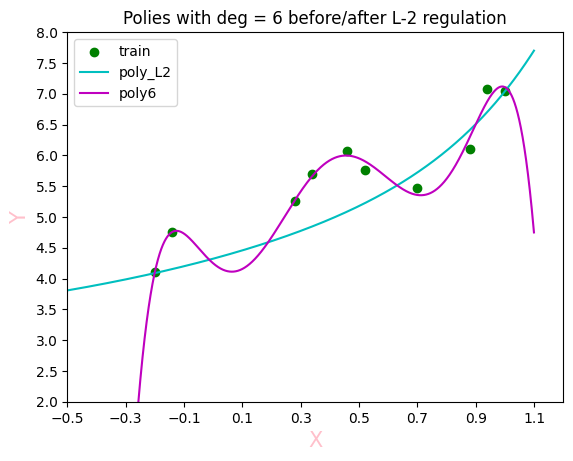

In [2574]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig = plt.subplots()
plt.title("Polies with deg = 6 before/after L-2 regulation")
ax = plt.gca()
ax.set_xlabel("X", fontsize=15, color='pink')
ax.set_ylabel("Y", fontsize=15, color='pink')
plt.ylim(-1.5, 8)

plt.scatter(X_train, Y_train, color = "g", label = "train")

grap_x = np.arange(-0.5, 1.1, 0.0005)
grap_y = np.fliplr(np.vander(grap_x, 7)).dot(coef.T[0])
plt.plot(np.array([grap_x]).T, np.array([grap_y]).T, color = "c", label = "poly_L2")



X_n = np.fliplr(np.vander(X_train.T[0], 7))
coefi = np.linalg.pinv((X_n.T.dot(X_n))).dot(X_n.T).dot(Y_train)
gr_y = np.fliplr(np.vander(grap_x, 7)).dot(coefi.T[0])
plt.plot(grap_x, gr_y, color="m", label="poly6")

plt.legend()
plt.xticks(np.arange(-0.5, 1.2, 0.2))
plt.yticks(np.arange(2, 8.1, 0.5))
plt.xlim(-0.5, 1.2)
plt.ylim(2,8)
plt.show()

**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

В модели с регуляцией мы получили функцию строгой монотонности, отражающую характер регрессии (возрастающий), без регуляризации мы получили функцию, приближающую значения в данной выборке, но в других точках она ведет себя иначе, то есть по такой модели невозможно предсказать значение в другой точке.

Регуляризация позволяет сделать выводы о корреляции, минимизируя эффект шумов, так как мы одновременно работает с МНК и минимизируем значения коэффициентов, за счет этого становится понятно, как ведут себя искомое значение в зависимости от экзогенного параметра.

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$ ($k \leqslant n$), $y \in \mathbb{R}^n$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k$. Решите теоретически следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$
(То есть найдите все векторы $a \in \mathbb{R}^k$, для которых выражение слева принимает наименьшее возможное значение.) В частности, докажите существование решений и укажите их количество в зависимости от входных данных.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обозначим $f(a) = |Xa - y|^2 + \lambda |a|^2$. Функция $f$ является квадратичной формой с матрицей $X^TX+\lambda E$ и свободным вектором $2X^Ty$. Поскольку $\text{rk}~X=k$, то $X^TX$ является невырожденной матрицей размера $k$. Следовательно, матрица $X^TX+\lambda E$ также является невырожденной и квадратичная форма $f$ является положительно определенной. Это означает, что функция $f$ достигает своего минимального значения, причем единственное такое значение, в единственной стационарной точке. Стационарные точки функции $f$ находятся путем решения системы уравнений:
$$(X^TX+\lambda E)a = X^Ty.$$ 
Поскольку матрица $(X^TX+\lambda E)$ невырождена, система имеет единственное решение $a=(X^TX+\lambda E)^{-1}X^Ty$. 

Таким образом, существует единственная точка минимума $a=(X^TX+\lambda E)^{-1}X^Ty$ и это единственное решение задачи оптимизации.

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

**8. [0.25 балла]** Попробуйте объяснить, почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Регуляризация (штрафование) коэффициента при константном признаке может быть плохой идеей по нескольким причинам:

Константный признак (состоящий из одних единиц) используется для учета некоторого базового уровня (аналогия области определения параметров в соотвествии с их логикой), присутствующего во всех наблюдениях. Если штрафовать коэффициент при этом признаке, то фактически искажаются базовые значения нашей модели, что может привести к неправильной интерпретации результатов.

В общем, штрафование коэффициентов при признаках, которые имеют малую вариативность (то есть относительно небольшой разброс значений, это, например, константный признак), может привести к снижению производительности модели и увеличению ошибки предсказаний.

В целом, регуляризация коэффициента при константном признаке нужна только в том случае, если мы уверены в том, что этот признак не нужен для нашей модели или если он содержит какие-то ошибки или не учитывает некоторые значения.

**9. [0.5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Если ранг матрицы меньше k, то какие-то признаки являются линейно зависимыми, то есть $X^TX$ - вырожденная матрица (произведение определителей равно 0), тогда матрица $X^TX+\lambda E$ также является вырожденной (при прибавлении вектора извне система векторов не может перестать быть линейно зависимой, если она уже была линейно заивисимой), и исходная квадратичная форма $f$ является неопределенной, тогда  не существует единственного решения, их бесконечно много.

**10. [0.25 балла]** Покажите теоретически, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$. Почему большие веса в линейной модели — плохо?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

При наличии бесконечного числа решений, мы можем рассмотреть последовательность решений $a_n$ с компонентами $a_n^i$, таких что $|a_n^i| \rightarrow \infty$ при $n \rightarrow \infty$. Так как целевая функция непрерывна, то $|Xa_n - y|^2 + \lambda |a_n|^2 \rightarrow \infty$ при $n \rightarrow \infty$, что означает, что среди бесконечного множества решений найдутся решения, которые не являются оптимальными.


Большие веса в линейной модели:

Связаны с проблемой с масштабированием: если веса слишком большие, то модель может очень хорошо приближать обучающую выборку, но плохо работать на новых данных. Это проявляется в том, что модель будет иметь высокую ошибку на контрольной выборке.

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$, и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$. Опишите ваш алгоритм теоретически и обоснуйте его сложность.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заметим, что для $t+1$ объекта выполнено: $X_{(t+1)}^T = [X_{(t)}^T, x_{t+1}^T]$ и $y_{(t+1)}^T = [y_{(t)}^T, y_{t+1}]$, где $x_{t+1}^T$ и $y_{t+1}$ -- строки матриц $X_{(t+1)}$ и $y_{(t+1)}$ соответственно. Тогда имеем:
$$
\begin{aligned}
X_{(t+1)}^T X_{(t+1)} &= [X_{(t)}^T, x_{t+1}^T] [X_{(t)}^T, x_{t+1}^T]^T \\
&= X_{(t)}^T X_{(t)} + x_{t+1} x_{t+1}^T \\
X_{(t+1)}^T y_{(t+1)} &= [X_{(t)}^T, x_{t+1}^T] [y_{(t)}^T, y_{t+1}]^T \\
&= X_{(t)}^T y_{(t)} + x_{t+1} y_{t+1}.
\end{aligned}
$$

Таким образом, чтобы пересчитать матрицы для $t+1$ объекта, нужно добавить к $X_{(t)}^T X_{(t)}$ произведение $x_{t+1} x_{t+1}^T$ и к $X_{(t)}^T y_{(t)}$ произведение $x_{t+1} y_{t+1}$. Введем обозначения: $a_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}$ и $b_{(t)} = X_{(t)}^T y_{(t)}$. Тогда новые матрицы будут иметь вид:
$$
\begin{aligned}
X_{(t+1)}^T X_{(t+1)} &= X_{(t)}^T X_{(t)} + x_{t+1}x_{t+1}^T \\

&= X_{(t)}^T X_{(t)} + vv^T, \quad \text{ где } v = \begin{pmatrix}0 \\
 \vdots \\ 
 0 \\ x_{t+1}\end{pmatrix} \\

\left(X_{(t+1)}^T X_{(t+1)}\right)^{-1} &= \left(X_{(t)}^T X_{(t)} + vv^T\right)^{-1} = a_{(t)} - \frac{a_{(t)}vv^Ta_{(t)}}{1 + v^Ta_{(t)}v}, \\

X_{(t+1)}^T y_{(t+1)} &= X_{(t)}^T y_{(t)} + x_{t+1}y_{t+1} \\

&= b_{(t)} + uy_{t+1}, \quad \text{ где } u = \begin{pmatrix}0 \\
 \vdots \\ 0 
 \\ 1\end{pmatrix}.

\end{aligned}
$$

Таким образом, мы получили алгоритм, который работает за время $O(k^2)$, где $k$ - размерность объектов (векторов $x_i$).

**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

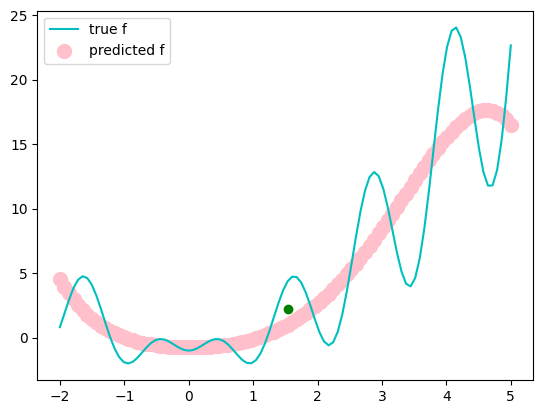

In [2575]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
  
    X_t1 = np.fliplr(np.vander([x_new], 6))

    res_x = x_grid_enl.T.dot(x_grid_enl) + X_t1.T.dot(X_t1) # X_{(t)}^T X_{(t)} + x_{t+1}x_{t+1}^T, a
    res_y = (x_grid_enl.T@(np.array([y_grid]).T )+ (X_t1).T*(y_new) ) #X_{(t)}^T y_{(t)} + x_{t+1}y_{t+1} , b
    
    
    # the rest of the code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='c', label='true f')
        plt.scatter(x_new, y_new, color='g')
        v = np.linalg.pinv(res_x)@res_y
        y_pred = lambda co, x: np.hstack((x.reshape((100,1))**j for j in range(6)))@co
        plt.scatter(x_grid, y_pred(v, x_grid), color='pink', linewidth=5, label='predicted f')
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ — верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.